In [1]:
#  Chargement des packages Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from datetime import date


In [2]:
# PARAMETRES
PrjLocation = '/home/ubuntu/XRAY/'              # Chemin Projet
ArchiveFolder = 'COVID-19_Radiography_Dataset/' # Dossier Archive
SampleAnalyzedPerClass = 2000

In [3]:
# Récupération des metadata
df_Normal = pd.read_excel(PrjLocation + ArchiveFolder + 'Normal.metadata.xlsx')
df_COVID = pd.read_excel(PrjLocation + ArchiveFolder + 'COVID.metadata.xlsx')
df_LungOpacity = pd.read_excel(PrjLocation + ArchiveFolder + 'Lung_Opacity.metadata.xlsx')
df_ViralPneumonia = pd.read_excel(PrjLocation + ArchiveFolder + 'Viral Pneumonia.metadata.xlsx')


In [4]:
# Ajout feature Class
df_Normal['Class'] = 'Normal'
df_COVID['Class'] = 'COVID'
df_LungOpacity['Class'] = 'Lung Opacity'
df_ViralPneumonia['Class'] = 'Viral Pneumonia'

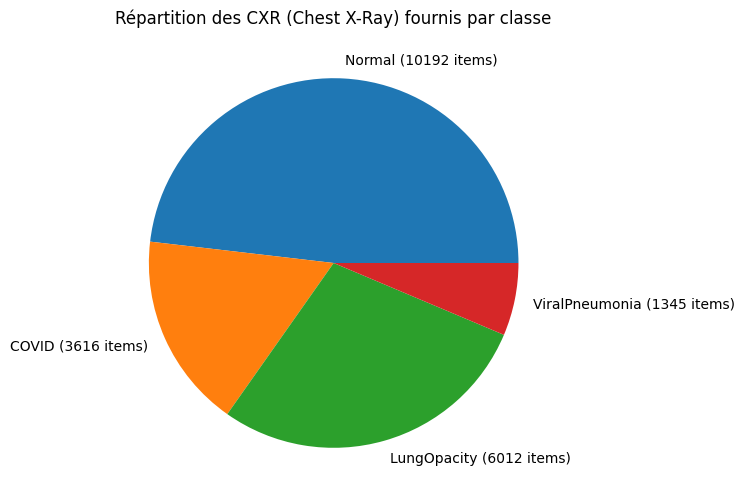

In [5]:
# Répartition des cas par classe
plt.figure(figsize=(12,6))
str(df_Normal.shape[0])
plt.pie([df_Normal.shape[0],df_COVID.shape[0],df_LungOpacity.shape[0],df_ViralPneumonia.shape[0]],
        labels=['Normal (' + str(df_Normal.shape[0]) + ' items)' ,'COVID (' + str(df_COVID.shape[0]) + ' items)','LungOpacity (' + str(df_LungOpacity.shape[0]) + ' items)','ViralPneumonia (' + str(df_ViralPneumonia.shape[0]) + ' items)'])
plt.title('Répartition des CXR (Chest X-Ray) fournis par classe')
plt.show()

In [6]:
# Ajout des images Normal
df_Normal['FILE NAME'] = df_Normal['FILE NAME'].str.replace('NORMAL','Normal') # Trick pour obtenir la bonne casse des noms de fichiers
NormalFolder = PrjLocation + ArchiveFolder + 'Normal/'
IMG_NORMAL = []
for file in df_Normal.loc[:min(SampleAnalyzedPerClass,df_Normal.shape[0]),'FILE NAME']:
    img = cv2.imread(NormalFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_NORMAL.append(img)


In [7]:
# Ajout des masques Normal
df_Normal['FILE NAME'] = df_Normal['FILE NAME'].str.replace('NORMAL','Normal') # Trick pour obtenir la bonne casse des noms de fichiers
NormalFolder = PrjLocation + ArchiveFolder + 'Normal/'
MSK_NORMAL = []
for file in df_Normal.loc[:min(SampleAnalyzedPerClass,df_Normal.shape[0]),'FILE NAME']:
    msk = cv2.imread(NormalFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_NORMAL.append(msk)

In [8]:
# Ajout des images COVID
COVIDFolder = PrjLocation + ArchiveFolder + 'COVID/'
IMG_COVID = []
for file in df_COVID.loc[:min(SampleAnalyzedPerClass,df_COVID.shape[0]),'FILE NAME']:
    img = cv2.imread(COVIDFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_COVID.append(img)

In [9]:
# Ajout des masques COVID
COVIDFolder = PrjLocation + ArchiveFolder + 'COVID/'
MSK_COVID = []
for file in df_COVID.loc[:min(SampleAnalyzedPerClass,df_COVID.shape[0]),'FILE NAME']:
    msk = cv2.imread(COVIDFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_COVID.append(msk)

In [10]:
# Ajout des images LungOpacity
LOFolder = PrjLocation + ArchiveFolder + 'Lung_Opacity/'
IMG_LO = []
for file in df_LungOpacity.loc[:min(SampleAnalyzedPerClass,df_LungOpacity.shape[0]),'FILE NAME']:
    img = cv2.imread(LOFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_LO.append(img)

In [11]:
# Ajout des masques LungOpacity
LOFolder = PrjLocation + ArchiveFolder + 'Lung_Opacity/'
MSK_LO = []
for file in df_LungOpacity.loc[:min(SampleAnalyzedPerClass,df_LungOpacity.shape[0]),'FILE NAME']:
    msk = cv2.imread(LOFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_LO.append(msk)

In [12]:
# Ajout des images Viral Pneumonia
VPFolder = PrjLocation + ArchiveFolder + 'Viral Pneumonia/'
IMG_VP = []
for file in df_ViralPneumonia.loc[:min(SampleAnalyzedPerClass,df_ViralPneumonia.shape[0]),'FILE NAME']:
    img = cv2.imread(VPFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_VP.append(img)

In [13]:
# Ajout des masques Viral Pneumonia
VPFolder = PrjLocation + ArchiveFolder + 'Viral Pneumonia/'
MSK_VP = []
for file in df_ViralPneumonia.loc[:min(SampleAnalyzedPerClass,df_ViralPneumonia.shape[0]),'FILE NAME']:
    msk = cv2.imread(VPFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_VP.append(msk)

In [14]:
# Troncature SampleAnalyzedPerClass
df_Normal = df_Normal.iloc[:min(SampleAnalyzedPerClass,df_Normal.shape[0]),:]
df_COVID = df_COVID.iloc[:min(SampleAnalyzedPerClass,df_COVID.shape[0]),:]
df_LungOpacity = df_LungOpacity.iloc[:min(SampleAnalyzedPerClass,df_LungOpacity.shape[0]),:]
df_ViralPneumonia = df_ViralPneumonia.iloc[:min(SampleAnalyzedPerClass,df_ViralPneumonia.shape[0]),:]


In [15]:
# Ajout feature Image
df_Normal['Image'] = IMG_NORMAL[:min(SampleAnalyzedPerClass,df_Normal.shape[0])]
df_COVID['Image'] = IMG_COVID[:min(SampleAnalyzedPerClass,df_COVID.shape[0])]
df_LungOpacity['Image'] = IMG_LO[:min(SampleAnalyzedPerClass,df_LungOpacity.shape[0])]
df_ViralPneumonia['Image'] = IMG_VP[:min(SampleAnalyzedPerClass,df_ViralPneumonia.shape[0])]

# Ajout feature Mask
df_Normal['Mask'] = MSK_NORMAL[:min(SampleAnalyzedPerClass,df_Normal.shape[0])]
df_COVID['Mask'] = MSK_COVID[:min(SampleAnalyzedPerClass,df_COVID.shape[0])]
df_LungOpacity['Mask'] = MSK_LO[:min(SampleAnalyzedPerClass,df_LungOpacity.shape[0])]
df_ViralPneumonia['Mask'] = MSK_VP[:min(SampleAnalyzedPerClass,df_ViralPneumonia.shape[0])]

In [16]:
# Construction d'un Dataframe global
df = pd.concat([df_Normal,df_COVID,df_LungOpacity,df_ViralPneumonia])

df.reset_index(drop=True,inplace=True)

# Sauvegarde du df
df.to_csv(PrjLocation + 'Reports/' + str(date.today()) + '_df_extract.csv')

In [17]:
# Fonction permettant d'obtenir des statistiques sur l'image analysées
#   - PixelCount = Nombre de pixel de l'image filtrée (surface)
#   - Brightness = Valeur moyenne de l'intensité des pixels de l'image filtrée
#   - BrightnessAmbient = Valeur moyenne de l'intensité des pixels de l'image en dehors du mask (intensité de l'ambiance)
def Get_CXRStats(img,msk):
    msk = cv2.resize(msk,(299,299))
    img2 = cv2.bitwise_and(img,msk)
    PixelCount = msk[msk==255].size
    Brightness = img[msk==255].mean()
    BrightnessAmbient = img[msk==0].mean()
    return PixelCount, Brightness, BrightnessAmbient

In [18]:
PixCnt = []
Bright = []
BrightAmb = []
for CXRi in df.index:
    a,b,c = Get_CXRStats(df.iloc[CXRi,5],df.iloc[CXRi,6])
    PixCnt.append(a)
    Bright.append(b)
    BrightAmb.append(c)

df['PixelCount'] = PixCnt
df['Brightness'] = Bright
df['BrightnessAmbient'] = BrightAmb

In [19]:
# Génération d'un numéro d'échantillon RandomIndex au hasard
rng = np.random.default_rng()
RandomIndex = rng.integers(low=0, high=df.shape[0], size=1)[0]


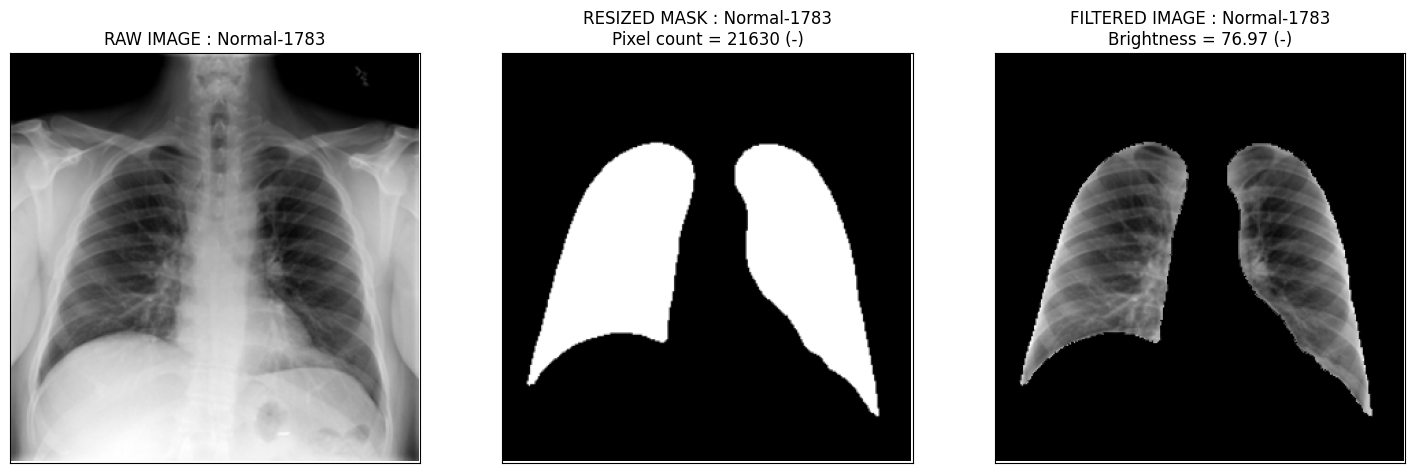

In [20]:
# CXR Viewer

# Sélection de l'échantillon à visualiser
Index = RandomIndex


fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,8))

img = df.iloc[Index,5]
msk = cv2.resize(df.iloc[Index,6],(299,299))

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(msk, cmap = 'gray')
ax[2].imshow(cv2.bitwise_and(img,msk), cmap = 'gray') # pour masquer mon_image, cmap = 'gray')

ax[0].set_title('RAW IMAGE : ' + df.iloc[Index,0])
ax[1].set_title('RESIZED MASK : ' + df.iloc[Index,0] + '\nPixel count = ' + str(df.iloc[Index,7]) + ' (-)')
ax[2].set_title('FILTERED IMAGE : ' + df.iloc[Index,0] + '\nBrightness = ' + f"{df.iloc[Index,8]:5.2f}" + ' (-)')

for axe in ax:
    axe.set_xlim([0,300])
    axe.set_ylim([300,0])
    axe.set_xticks([])
    axe.set_yticks([])



Text(0.5, 1.0, 'Dataset URL vs Class')

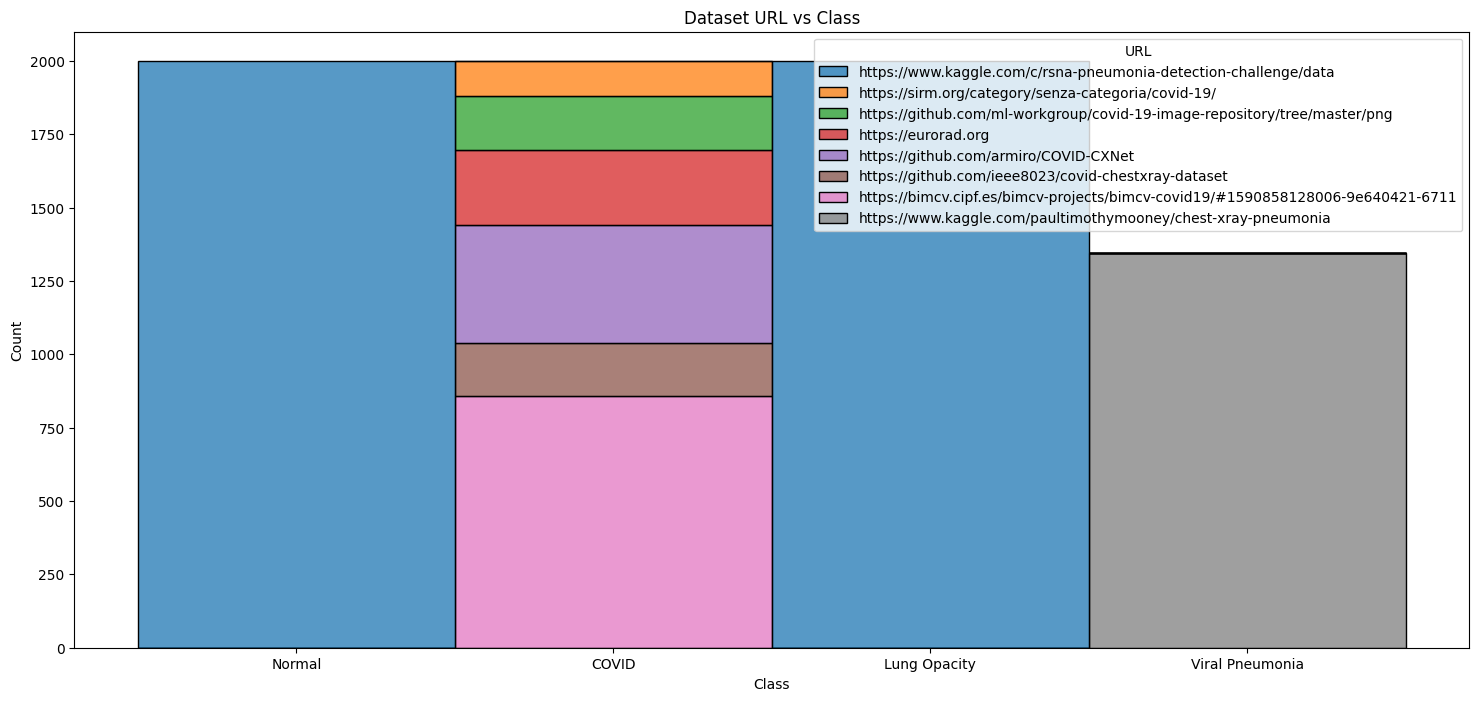

In [21]:
plt.figure(figsize=(18,8))
sns.histplot(df,x='Class',hue='URL', multiple="stack")
# plt.legend(loc='best')
plt.title('Dataset URL vs Class')

<Figure size 1800x800 with 0 Axes>

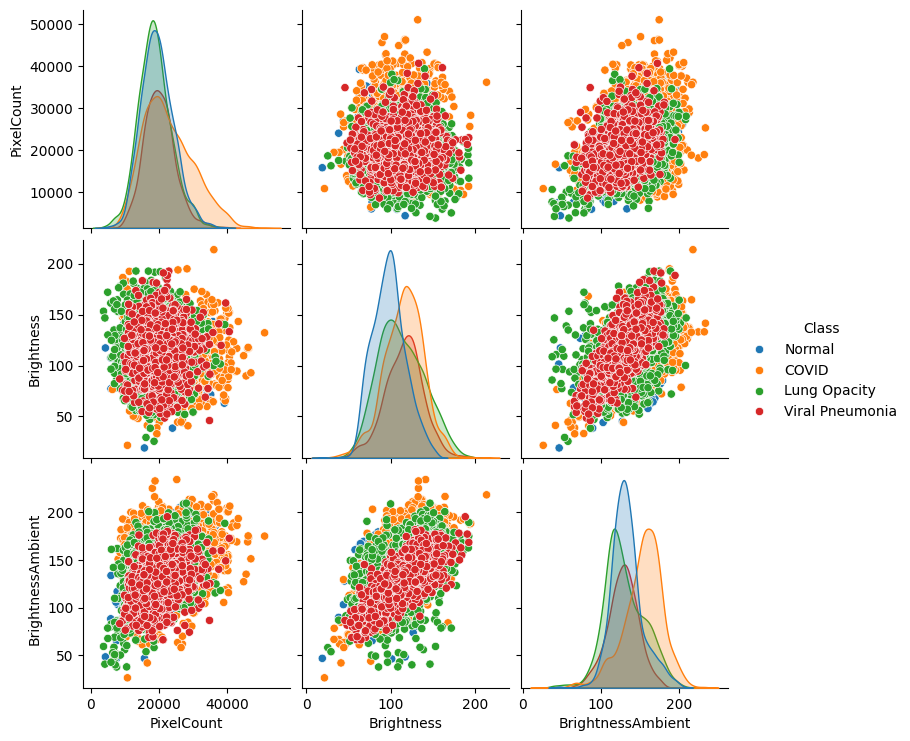

In [22]:
fig=plt.figure(figsize=(18,8))
sns.pairplot(data=df,vars=['PixelCount', 'Brightness', 'BrightnessAmbient'],hue='Class')

In [ ]:
# Fonction qui permet de récupérer des infos sur le masks
def AnalyzeMask(msk_remain, active_pix = -1, zones = -1, depth = -1):
    """
    INPUTS
        - msk : array[299,299] 

    OUTPUTS
        - DataFrame
            - ID zone : int
            - PixCnt : int
            - msk : array[299,299]
            - Act : bool
    """
    # print('Call with depth =',depth)
    if active_pix == -1:
        # Initialisation des paramètres d'appel
        # Recherche du premier pixel
        zone_found = False
        for x in range(msk_remain.shape[0]):
            for y in range(msk_remain.shape[1]):
                if msk_remain[x,y] == 255:
                    zone_found = True
                    print('zone found')
                    # Activation du pixel
                    active_pix = [x,y]
                    # Initialisation de la zone
                    if zones == -1:
                        # Création de la première zone -- instanciation du dataframe zones
                        zones = pd.DataFrame(   data = [[0,0,np.zeros_like(msk_remain),False]],
                                                index = [0],
                                                columns = ['ID','PixCnt','msk','act'])
                    else:
                        # Création d'une nouvelle zone
                        new_zone = pd.DataFrame(data = [[zones.shape[0],0,np.zeros_like(msk_remain),False]],
                                                index = [0],
                                                columns = ['ID','PixCnt','msk','act'])
                        zones = pd.concat([zones,new_zone],reset_index=True)
                    display(zones)
                    # Ajout du pixel dans la zone en cours
                    # zones.loc[zones.shape[0]-1,'msk']= zones.loc[zones.shape[0]-1,'msk'] + msk_remain[x,y]
                    # zones.loc[zones.shape[0]-1,'PixCnt'] += 1
                    zones.iloc[zones.shape[0]-1,1] += 1
                    to_add = np.zeros_like(msk_remain)                    
                    to_add[x,y] = 255
                    print(to_add.size)
                    print(zones.iloc[zones.shape[0]-1,2].size)
                    zones.iloc[zones.shape[0]-1,2] += to_add
                    
                    # Retrait du pixel de la zone de recherche
                    msk_remain[active_pix[0],active_pix[1]] = 0

                    # Appel récursif de AnalyzeMask
                    
                    AnalyzeMask(msk_remain, active_pix, zones, 0)

        if not zone_found:
            return zones
    else:
        # Recherche d'un nouveau pixel
        if active_pix[0] > 0:
            if msk_remain[active_pix[0]-1,active_pix[1]] == 255:
                # trouvé en haut => Appel récursif
                # Activation du pixel
                active_pix = [active_pix[0]-1,active_pix[1]]
                # Ajout du pixel dans la zone en cours
                zones.loc[-1,'msk']= zones.loc[-1,'msk'] + msk_remain[x,y]
                zones.loc[-1,'PixCnt'] += 1
                # Retrait du pixel de la zone de recherche
                msk_remain[active_pix[0],active_pix[1]] = 0
                # Appel récursif de AnalyzeMask
                AnalyzeMask(msk_remain, active_pix, zones, depth+1)
        if active_pix[0] < msk_remain.shape[0]:
            if msk_remain[active_pix[0]+1,active_pix[1]] == 255:
                # trouvé en bas
                # Activation du pixel
                active_pix = [active_pix[0]+1,active_pix[1]]
                # Ajout du pixel dans la zone en cours
                zones.loc[-1,'msk']= zones.loc[-1,'msk'] + msk_remain[x,y]
                zones.loc[-1,'PixCnt'] += 1
                # Retrait du pixel de la zone de recherche
                msk_remain[active_pix[0],active_pix[1]] = 0
                # Appel récursif de AnalyzeMask
                AnalyzeMask(msk_remain, active_pix, zones, depth+1)
        if active_pix[1] > 0:
            if msk_remain[active_pix[0],active_pix[1]-1] == 255:
                # trouvé à gauche
                # Activation du pixel
                active_pix = [active_pix[0],active_pix[1]-1]
                # Ajout du pixel dans la zone en cours
                zones.loc[-1,'msk']= zones.loc[-1,'msk'] + msk_remain[x,y]
                zones.loc[-1,'PixCnt'] += 1
                # Retrait du pixel de la zone de recherche
                msk_remain[active_pix[0],active_pix[1]] = 0
                # Appel récursif de AnalyzeMask
                AnalyzeMask(msk_remain, active_pix, zones, depth+1)
        if active_pix[1] < msk_remain.shape[1]:
            if msk_remain[active_pix[0],active_pix[1]+1] == 255:
                # trouvé à droite
                # Activation du pixel
                active_pix = [active_pix[0],active_pix[1]+1]
                # Ajout du pixel dans la zone en cours
                zones.loc[-1,'msk']= zones.loc[-1,'msk'] + msk_remain[x,y]
                zones.loc[-1,'PixCnt'] += 1
                # Retrait du pixel de la zone de recherche
                msk_remain[active_pix[0],active_pix[1]] = 0
                # Appel récursif de AnalyzeMask
                AnalyzeMask(msk_remain, active_pix, zones, depth+1)

        # Recherche d'une nouvelle zone
        if depth == 0:
            active_pix = -1
            AnalyzeMask(msk_remain, active_pix, zones, -1)

In [87]:
Z = AnalyzeMask(msk)

Z

zone found


,ID,PixCnt,msk,act
0,0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False


89401
89401


ValueError: Must have equal len keys and value when setting with an ndarray

In [81]:
msk.size
msk[0,1] = 255 
msk.size

89401

In [ ]:
for x in range(msk.shape[0]):
    for y in range(msk.shape[1]):
        if msk[x,y] == 255:
            # Activation du pixel
            active_pix = [x,y]

msk[active_pix[0],active_pix[1]]


In [40]:
zones = pd.DataFrame(   data = [[0,1,msk,False]],
                        index = [0],
                        columns = ['ID','bui','M','b']) 


zones.head()

,ID,bui,M,b
0,0,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False


In [36]:
np.zeros_like(msk)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)